# Support Vector Machine Classifiers for audio files , features extracted from MIDI   

Repeating earlier analysis, now on a larger data set of 15 second clips 

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline

In [2]:
data_dir = './DataStreamFeatures/DataFrames/'

df_best_features = pd.read_csv(data_dir + 'BestMusicFeatures_15seconds.csv')

df_best_features.head()

,Range,PitchVariety,NumberOfCommonPitches,NoteDensity,AmountOfArpeggiation,IntervalBetweenStrongestPitches,MostCommonPitchClassPrevalence,MostCommonPitchPrevalence,RelativeStrengthOfTopPitchClasses,RepeatedNotes,MelodicOctaves,SizeOfMelodicArcs,VariabilityOfNoteDuration,MelodicTritones,PitchClassVariety,Composer_name,Composer_label
0,24.0,18.0,3.0,7.238095,0.562500,7.0,0.315789,0.263158,0.777778,0.348214,0.008929,6.216216,0.089537,0.000000,11.0,Bach,0.0
1,22.0,15.0,4.0,5.269841,0.304878,1.0,0.204819,0.144578,0.882353,0.024390,0.048780,8.261905,0.070927,0.012195,8.0,Bach,0.0
2,31.0,21.0,2.0,6.730159,0.432692,7.0,0.264151,0.188679,0.535714,0.096154,0.009615,7.583333,0.091070,0.000000,12.0,Bach,0.0
3,24.0,17.0,2.0,7.365079,0.508772,7.0,0.336207,0.301724,0.717949,0.412281,0.008772,5.437500,0.083497,0.000000,10.0,Bach,0.0
4,24.0,18.0,3.0,7.047619,0.513761,7.0,0.315315,0.252252,0.657143,0.284404,0.009174,6.944444,0.089949,0.000000,11.0,Bach,0.0


In [3]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

480 samples with 15 features each <class 'numpy.ndarray'>


In [4]:
y = df_best_features['Composer_label'].to_numpy()

y.shape

(480,)

In [5]:
# 480 samples instead of 240 for 30 seconds data set 

# Scale Features using Standard Scalar

# First Trial, take only two features, can then make cool Scatter plots

In [6]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

480 samples with 15 features each <class 'numpy.ndarray'>


In [7]:
print(X.shape)

X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(480, 15)
(480, 2)


Test different kernals some statring parameters

In [8]:
linear = svm.SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=10, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=10, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=10, decision_function_shape='ovo').fit(X_train, y_train)

In [9]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

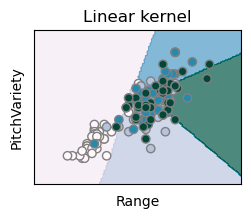

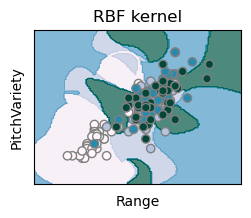

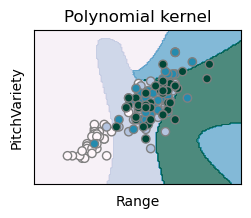

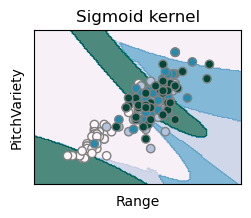

In [10]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[0])
    plt.ylabel(training_features_list[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [11]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.4305555555555556
Accuracy Polynomial Kernel: 0.4027777777777778
Accuracy Radial Basis Kernel: 0.4305555555555556
Accuracy Sigmoid Kernel: 0.3194444444444444


# TRY NEXT TWO FEATURES 

In [12]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

480 samples with 15 features each <class 'numpy.ndarray'>


In [13]:
print(X.shape)

X = X[:,2:4]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X.shape)

(480, 15)
(480, 2)


In [14]:
linear = svm.SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=10, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=10, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=10, decision_function_shape='ovo').fit(X_train, y_train)

In [15]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .05
#create the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

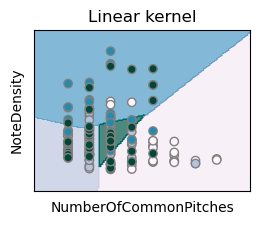

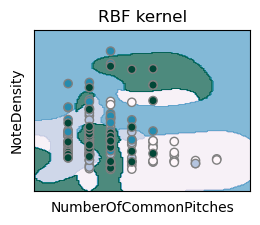

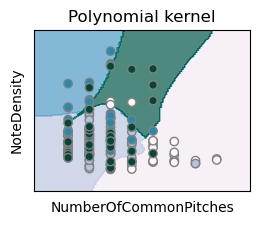

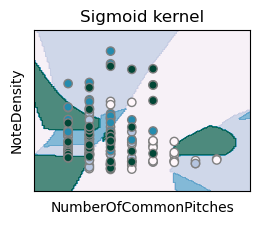

In [16]:
for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.3, hspace=0.3) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X_scaled[::3, 0], X_scaled[::3, 1], c=y[::3], cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel(training_features_list[2])
    plt.ylabel(training_features_list[3])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [17]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.3611111111111111
Accuracy Polynomial Kernel: 0.3611111111111111
Accuracy Radial Basis Kernel: 0.4166666666666667
Accuracy Sigmoid Kernel: 0.3055555555555556


# Try with Full list of Features, same parameters

In [18]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_scaled = scaler.transform(X)

print(X_scaled.shape)

480 samples with 15 features each <class 'numpy.ndarray'>
(480, 15)


In [19]:
linear_all = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf_all = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly_all = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig_all = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [20]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin_all = linear_all.score(X_test, y_test)
accuracy_poly_all = poly_all.score(X_test, y_test)
accuracy_rbf_all = rbf_all.score(X_test, y_test)
accuracy_sig_all = sig_all.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin_all)
print('Accuracy Polynomial Kernel:', accuracy_poly_all)
print('Accuracy Radial Basis Kernel:', accuracy_rbf_all)
print('Accuracy Sigmoid Kernel:', accuracy_sig_all)

Accuracy Linear Kernel: 0.6111111111111112
Accuracy Polynomial Kernel: 0.5138888888888888
Accuracy Radial Basis Kernel: 0.625
Accuracy Sigmoid Kernel: 0.5694444444444444


# Try Grid Search for Linear and Polynomial Kernels , which seem to work best

- based on grid search example in scikit learn documentation [Grid Search SV](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html)

In [21]:
## will use cross validation for the grid search... 

X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))


#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state = 0)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#Scale X and take all X and y

X_scaled = scaler.fit_transform(X)

print(X.shape)

480 samples with 15 features each <class 'numpy.ndarray'>
(480, 15)


In [45]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'C': [1,10,100,1000,1e4,1e5,1e6,1e7,1e8]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [1, 10, 100, 1000, 10000.0, 100000.0, 1000000.0,
                                10000000.0, 100000000.0],
                          'gamma': [0.001], 'kernel': ['rbf']}])

In [46]:
results_df = pd.DataFrame(search.cv_results_)

results_df['C']=[p['C'] for p in results_df['params'].values]
results_df['log_10[C]']=[np.log10(p['C']) for p in results_df['params'].values]

results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
10000.0_0.001_rbf,"{'C': 10000.0, 'gamma': 0.001, 'kernel': 'rbf'}",1,0.647917,0.048591
100000.0_0.001_rbf,"{'C': 100000.0, 'gamma': 0.001, 'kernel': 'rbf'}",2,0.647083,0.040752
1000_0.001_rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",3,0.637500,0.038302
1000000.0_0.001_rbf,"{'C': 1000000.0, 'gamma': 0.001, 'kernel': 'rbf'}",4,0.637083,0.040363
10000000.0_0.001_rbf,"{'C': 10000000.0, 'gamma': 0.001, 'kernel': 'r...",4,0.637083,0.040363
100000000.0_0.001_rbf,"{'C': 100000000.0, 'gamma': 0.001, 'kernel': '...",4,0.637083,0.040363
100_0.001_rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",7,0.602917,0.041596
10_0.001_rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",8,0.577083,0.041978
1_0.001_rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",9,0.522917,0.038752


<AxesSubplot: xlabel='log_10[C]'>

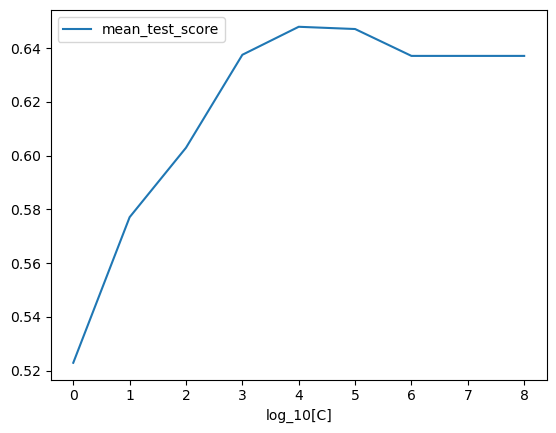

In [47]:
results_df = results_df.sort_values(by=["C"])

results_df.plot(x='log_10[C]',y='mean_test_score')

In [50]:
# View the accuracy score
print('Best score for training data:', search.best_score_,"\n") 

# View the best parameters for the model found using grid search

Best_C = search.best_estimator_.C

print('Best C:',Best_C,"\n") 
print('Best Kernel:',search.best_estimator_.kernel,"\n")
print('Best Gamma:',search.best_estimator_.gamma,"\n")

final_model = search.best_estimator_

Best score for training data: 0.6479166666666667 

Best C: 10000.0 

Best Kernel: rbf 

Best Gamma: 0.001 



In [97]:
# Take best Value for C, and search gamma space now...

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [Best_C]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_gamma = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_gamma.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [10000.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

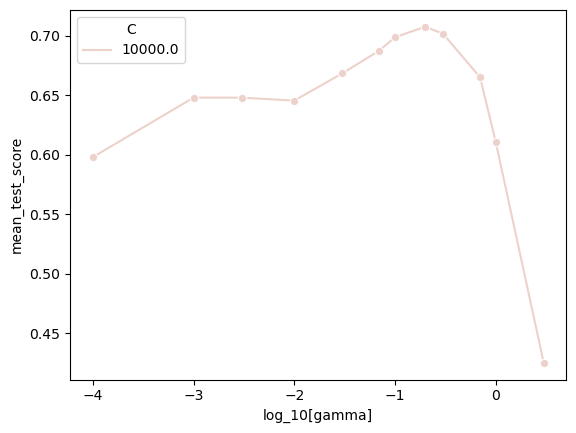

In [98]:
results_df = pd.DataFrame(search_gamma.cv_results_)

results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

results_df['C']=[p['C'] for p in results_df['params'].values]

results_df = results_df.sort_values(by=["log_10[gamma]"])

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')
#results_df.plot(x='log_10[gamma]',y='mean_test_score',color='C',marker='o')

In [99]:
# Repeat for smaller C, poor mans way to sweep gamma C space 

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [0.01*Best_C]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_gamma_smallerC = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_gamma_smallerC.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [100.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [100]:
# GOING TO TAKE THIS VALUE OF C AS BEST MODEL, see results below, value of C not too important ! 

results_df_smallerC = pd.DataFrame(search_gamma_smallerC.cv_results_)

results_df_smallerC['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_smallerC['params'].values]

results_df_smallerC['C']=[p['C'] for p in results_df_smallerC['params'].values]

results_df = pd.concat([results_df,results_df_smallerC])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

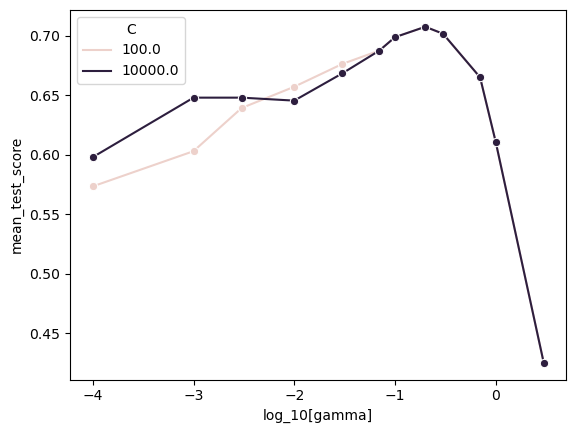

In [101]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [102]:
# Repeat for smaller C, poor mans way to sweep gamma C space 

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [0.001*Best_C]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_gamma_smallerC_2 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_gamma_smallerC_2.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [10.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [104]:
results_df_smallerC_2 = pd.DataFrame(search_gamma_smallerC_2.cv_results_)

results_df_smallerC_2['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_smallerC_2['params'].values]

results_df_smallerC_2['C']=[p['C'] for p in results_df_smallerC_2['params'].values]

results_df = pd.concat([results_df,results_df_smallerC_2])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

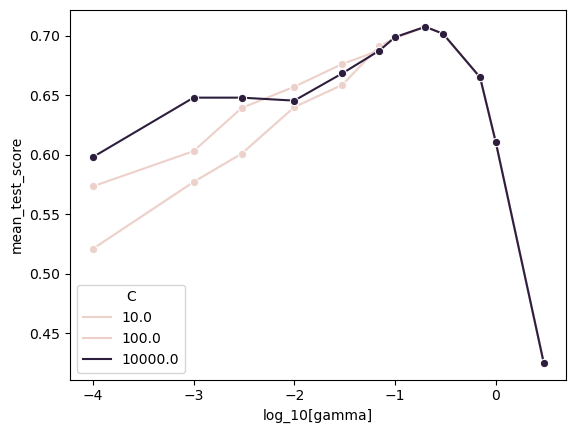

In [106]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [107]:
# Repeat for smaller C, poor mans way to sweep gamma C space 

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [100*Best_C]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_gamma_largerC = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_gamma_largerC.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [1000000.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [108]:
results_df_largerC = pd.DataFrame(search_gamma_largerC.cv_results_)

results_df_largerC['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_largerC['params'].values]

results_df_largerC['C']=[p['C'] for p in results_df_largerC['params'].values]

results_df = pd.concat([results_df,results_df_largerC])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

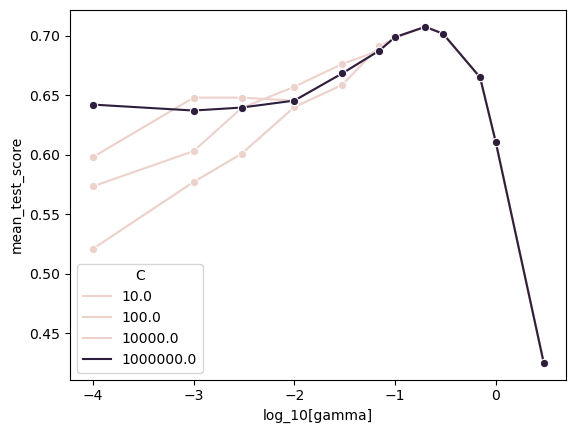

In [109]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

In [110]:
# Repeat for smaller C, poor mans way to sweep gamma C space 

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-4,1e-3,3e-3,1e-2,3e-2,7e-2,1e-1,2e-1,3e-1,7e-1,1e0,3e0],
                     'C': [10000*Best_C]}]

# not sure why, grid search didn't like the polynomial kernel...

svc = SVC(random_state=0)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)

search_gamma_largerC_2 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv)
search_gamma_largerC_2.fit(X_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'C': [100000000.0],
                          'gamma': [0.0001, 0.001, 0.003, 0.01, 0.03, 0.07, 0.1,
                                    0.2, 0.3, 0.7, 1.0, 3.0],
                          'kernel': ['rbf']}])

In [111]:
results_df_largerC_2 = pd.DataFrame(search_gamma_largerC_2.cv_results_)

results_df_largerC_2['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df_largerC_2['params'].values]

results_df_largerC_2['C']=[p['C'] for p in results_df_largerC_2['params'].values]

results_df = pd.concat([results_df,results_df_largerC_2])

<AxesSubplot: xlabel='log_10[gamma]', ylabel='mean_test_score'>

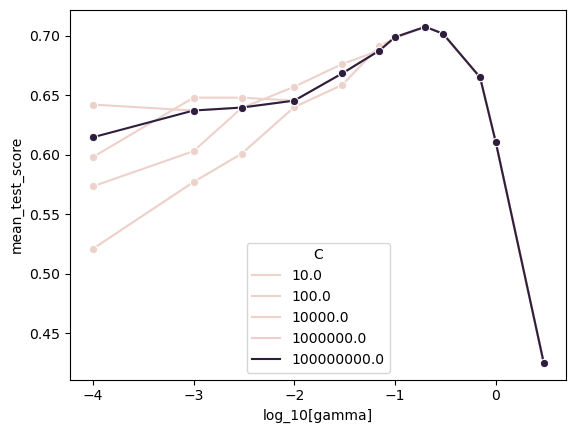

In [112]:
results_df['log_10[gamma]']=[np.log10(p['gamma']) for p in results_df['params'].values]

sns.lineplot(data=results_df, x="log_10[gamma]", y="mean_test_score",hue='C',marker='o')

# Conclusions : Gamma and C search : 

* after searching appears that tuning the value of gamma is most important , optimal = gamma = 0.2 = 2e-1 

* for optimal gamma value , C doesn't make much difference 

* all things being equal, makes sense to take moderate value of C , so will take C = 100 

* see [RBF SVM Parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) guide which explains meaning and trades for different choices of C and Gamma

* results above have more dependence on C, not sure why gamma is so much more dominant for our music data ???? 

In [118]:
# View the accuracy score
print('Best score for training data:', search.best_score_,"\n") 

# View the best parameters for the model found using grid search

Best_C = search_gamma_smallerC.best_estimator_.C

Best_GAMMA = search_gamma_smallerC.best_estimator_.gamma

print('Best C:',Best_C,"\n") 
print('Best Kernel:',search_gamma_smallerC.best_estimator_.kernel,"\n")
print('Best Gamma:',Best_GAMMA,"\n")

final_model = search_gamma_smallerC.best_estimator_

Best score for training data: 0.6987499999999999 

Best C: 100.0 

Best Kernel: rbf 

Best Gamma: 0.2 



In [ ]:
# TO PREDICT 

# need to apply standardScalar to the test data set with 22 features... then call predict method on model

#Y_pred = final_model.predict(X_test_scaled)

In [128]:
X = df_best_features.drop(['Composer_name', 'Composer_label'], axis=1)

training_features_list = list(X.columns)

X = X.to_numpy()

m, n = X.shape

print(f'{m} samples with {n} features each',type(X))

480 samples with 15 features each <class 'numpy.ndarray'>


In [130]:
from sklearn.model_selection import learning_curve

svm_best_params = svm.SVC(kernel='rbf', gamma=Best_GAMMA, C=Best_C, decision_function_shape='ovo')

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=0)


train_size_abs, train_scores, test_scores = learning_curve(
                                                            svm_best_params, X, y, cv=cv,train_sizes=np.linspace(0.3,1,20)
)


size_list = []

cv_train_list = []

cv_test_list = []

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs, train_scores, test_scores
):
    size_list.append(train_size)
    cv_train_list.append(cv_train_scores.mean())
    cv_test_list.append(cv_test_scores.mean())
    
    
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.5f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.5f}")

115 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.25042
129 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.25708
143 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.27333
157 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.34125
171 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.45250
185 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.43625
200 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.43292
214 samples were used to train the model
The average train accuracy is 1.00000
The average test accuracy is 0.43625
228 samples were used to train the model
The average train accuracy is 1

<AxesSubplot: >

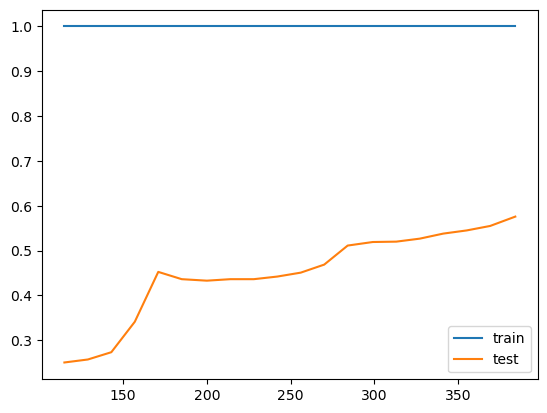

In [132]:
learning_df = pd.DataFrame(list(zip(cv_train_list, cv_test_list)),
               columns =['train','test'],index=size_list)

learning_df.plot()